In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install pandas 
!pip install -U pandas-profiling
!pip install mglearn # pacote para acessar funções auxiliares para o livro 'Introdução ao aprendizado de máquina com Python'

## SVM Exemplo 1
- Geralmente, Support Vector Machines é considerado uma abordagem de classificação, mas pode ser empregado em ambos os tipos de problemas de classificação e regressão

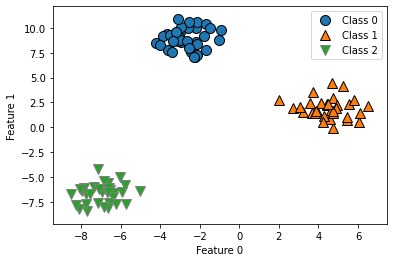

In [3]:
from sklearn.datasets import make_blobs
import mglearn
import pandas as pd
import matplotlib.pyplot as plt

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

## SVM Exemplo 2 - > Breast Cancer Wisconsin (Diagnostic) Data Set https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) 

In [4]:
#Importando datasets scikit-learn 
from sklearn import datasets

# Forma 1 de carregar dataset
cancer = datasets.load_breast_cancer()
print(type(cancer))

<class 'sklearn.utils.Bunch'>


## Explorando a base sem usar o from pandas_profiling import ProfileReport

In [5]:
# imprimir os nomes dos 13 recursos
print("Features: ", cancer.feature_names)

# imprimir o tipo de rótulo de câncer ('maligno' 'benigno')
print("Labels: ", cancer.target_names)

# formato de dados de (features)
print("Formato da base de dados: ", cancer.data.shape)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']
Formato da base de dados:  (569, 30)


# imprimir as Features de dados do câncer (5 principais registros)

In [6]:
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

## Vamos explorar um pouco mais. Você também pode verificar a forma do conjunto de dados usando a forma.

In [8]:
# print data(feature)shape
cancer.data.shape

(569, 30)

## Vamos dar uma olhada no conjunto que queremos classificar.

In [9]:
print(cancer.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

##Dividindo Dados

In [10]:
# Importar função train_test_split
from sklearn.model_selection import train_test_split

df = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
print(type(df))

# Dividindo o dataset em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% treinamento e 30% teste

<class 'pandas.core.frame.DataFrame'>


##Gerando modelo

In [12]:
#Primeiro importe o svm
from sklearn import svm

#Crie um classificador svm
clf = svm.SVC(kernel='linear') # Linear Kernel

#Treine o modelo usando os conjuntos de treinamento
clf.fit(X_train, y_train)

#Preveja a resposta para o conjunto de dados de teste
y_pred = clf.predict(X_test)

##Avaliando o modelo

In [13]:
#Importe o módulo de métricas do scikit-learn para cálculo de precisão (acuracia)
from sklearn import metrics

# O termo é definido como exatidão de um valor obtido com relação a um valor tomado como referência
# indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
# Precisão do modelo: com que frequência o classificador está correto?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#Bem, você obteve uma taxa de classificação de 96,49%, considerada uma precisão muito boa.

Accuracy: 0.9649122807017544


## Precisão: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;

In [14]:
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.9811320754716981


###Recall/Revocação/Sensibilidade: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;


In [15]:
print("Recall:",metrics.recall_score(y_test, y_pred))

Recall: 0.9629629629629629
